In [2]:
import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Download latest version
path = kagglehub.dataset_download("yasserh/horse-survival-dataset")

print("Path to dataset files:", path)



Path to dataset files: /kaggle/input/horse-survival-dataset


In [3]:
df = pd.read_csv('/kaggle/input/horse-survival-dataset/horse.csv')

print(df.head())
print(df.info())
print(df.describe())

  surgery    age  hospital_number  rectal_temp  pulse  respiratory_rate  \
0      no  adult           530101         38.5   66.0              28.0   
1     yes  adult           534817         39.2   88.0              20.0   
2      no  adult           530334         38.3   40.0              24.0   
3     yes  young          5290409         39.1  164.0              84.0   
4      no  adult           530255         37.3  104.0              35.0   

  temp_of_extremities peripheral_pulse mucous_membrane capillary_refill_time  \
0                cool          reduced             NaN            more_3_sec   
1                 NaN              NaN   pale_cyanotic            less_3_sec   
2              normal           normal       pale_pink            less_3_sec   
3                cold           normal   dark_cyanotic            more_3_sec   
4                 NaN              NaN   dark_cyanotic            more_3_sec   

   ... packed_cell_volume total_protein abdomo_appearance abdomo_pro

In [4]:
# Check fr duplicates


print(df.duplicated(subset=['hospital_number']))

df = df.drop_duplicates(subset=['hospital_number'])
print(df)

0      False
1      False
2      False
3      False
4      False
       ...  
294    False
295    False
296    False
297    False
298    False
Length: 299, dtype: bool
    surgery    age  hospital_number  rectal_temp  pulse  respiratory_rate  \
0        no  adult           530101         38.5   66.0              28.0   
1       yes  adult           534817         39.2   88.0              20.0   
2        no  adult           530334         38.3   40.0              24.0   
3       yes  young          5290409         39.1  164.0              84.0   
4        no  adult           530255         37.3  104.0              35.0   
..      ...    ...              ...          ...    ...               ...   
294     yes  adult           533886          NaN  120.0              70.0   
295      no  adult           527702         37.2   72.0              24.0   
296     yes  adult           529386         37.5   72.0              30.0   
297     yes  adult           530612         36.5  100.0       

In [5]:
# Check for missing values
print(df.isnull().sum())

print(df.columns)

#numeric data NA filled
df['rectal_temp'] = df['rectal_temp'].fillna(df['rectal_temp'].mean())
df['pulse'] = df['pulse'].fillna(df['pulse'].mean())
df['respiratory_rate'] = df['respiratory_rate'].fillna(df['respiratory_rate'].mean())
df['packed_cell_volume'] = df['packed_cell_volume'].fillna(df['packed_cell_volume'].mean())
df['total_protein'] = df['total_protein'].fillna(df['total_protein'].mean())
df['abdomo_protein'] = df['abdomo_protein'].fillna(df['abdomo_protein'].mean())



surgery                    0
age                        0
hospital_number            0
rectal_temp               56
pulse                     22
respiratory_rate          54
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      54
peristalsis               43
abdominal_distention      56
nasogastric_tube         102
nasogastric_reflux       104
nasogastric_reflux_ph    233
rectal_exam_feces        101
abdomen                  116
packed_cell_volume        28
total_protein             31
abdomo_appearance        157
abdomo_protein           188
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64
Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_

In [6]:
unique_surgery = df['surgery'].unique()
print("unique values for unique_surgery")
print(unique_surgery)

unique_age = df['age'].unique()
print("unique values for unique_age")
print(unique_age)

unique_extrtemp = df['temp_of_extremities'].unique()
print("unique values for unique_extrtemp")
print(unique_extrtemp)

unique_perfpulse = df['peripheral_pulse'].unique()
print("unique values for unique_perfpulse")
print(unique_perfpulse)

unique_mucmem = df['mucous_membrane'].unique()
print("unique values for unique_mucmem")
print(unique_mucmem)

unique_caprefill = df['capillary_refill_time'].unique()
print("unique values for unique_caprefill")
print(unique_caprefill)

unique_pain = df['pain'].unique()
print("unique values for unique_pain")
print(unique_pain)

unique_peri = df['peristalsis'].unique()
print("unique values for unique_peri")
print(unique_peri)

unique_adbdist = df['abdominal_distention'].unique()
print("unique values for unique_adbdist")
print(unique_adbdist)


unique_outcome = df['outcome'].unique()
print("unique values for unique_outcome")
print(unique_outcome)

unique_lesion = df['surgical_lesion'].unique()
print("unique values for unique_lesion")
print(unique_lesion)


#drop obj columns with a lot of missing data
columns_to_remove = ['nasogastric_tube', 'nasogastric_reflux', 'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'abdomo_protein', 'lesion_1', 'lesion_2', 'lesion_3', 'cp_data']

#df = df.drop(columns=columns_to_remove, axis=1)

print(df.columns)

unique_counts = df.nunique()
print(unique_counts)



unique values for unique_surgery
['no' 'yes']
unique values for unique_age
['adult' 'young']
unique values for unique_extrtemp
['cool' nan 'normal' 'cold' 'warm']
unique values for unique_perfpulse
['reduced' nan 'normal' 'absent' 'increased']
unique values for unique_mucmem
[nan 'pale_cyanotic' 'pale_pink' 'dark_cyanotic' 'normal_pink'
 'bright_red' 'bright_pink']
unique values for unique_caprefill
['more_3_sec' 'less_3_sec' nan '3']
unique values for unique_pain
['extreme_pain' 'mild_pain' 'depressed' nan 'severe_pain' 'alert']
unique values for unique_peri
['absent' 'hypomotile' nan 'hypermotile' 'normal']
unique values for unique_adbdist
['severe' 'slight' 'none' nan 'moderate']
unique values for unique_outcome
['died' 'euthanized' 'lived']
unique values for unique_lesion
['no' 'yes']
Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'pe

In [7]:
print("count of surgerys")
print(df['surgery'].value_counts())

print("counts of age")
print(df['age'].value_counts())

print("counts of extremeties")
print(df['temp_of_extremities'].value_counts())

print("counts of ppulse")
print(df['peripheral_pulse'].value_counts())

print("counts of membrane")
print(df['mucous_membrane'].value_counts())

print("counts of cap refill")
print(df['capillary_refill_time'].value_counts())

print("count of pain")
print(df['pain'].value_counts())

print("count of peristalsis")
print(df['peristalsis'].value_counts())

print("count of abd dist")
print(df['abdominal_distention'].value_counts())

print("count of outcome")
print(df['outcome'].value_counts())

print("count of lesion")
print(df['surgical_lesion'].value_counts())




count of surgerys
surgery
yes    171
no     112
Name: count, dtype: int64
counts of age
age
adult    259
young     24
Name: count, dtype: int64
counts of extremeties
temp_of_extremities
cool      100
normal     72
warm       30
cold       25
Name: count, dtype: int64
counts of ppulse
peripheral_pulse
normal       108
reduced       95
absent         7
increased      4
Name: count, dtype: int64
counts of membrane
mucous_membrane
normal_pink      74
pale_pink        51
pale_cyanotic    40
bright_pink      30
bright_red       22
dark_cyanotic    19
Name: count, dtype: int64
counts of cap refill
capillary_refill_time
less_3_sec    180
more_3_sec     69
3               2
Name: count, dtype: int64
count of pain
pain
mild_pain       64
depressed       56
extreme_pain    38
severe_pain     36
alert           35
Name: count, dtype: int64
count of peristalsis
peristalsis
hypomotile     118
absent          71
hypermotile     37
normal          14
Name: count, dtype: int64
count of abd dist
abdomin

In [8]:
#cols to fix nan values

obj_cols = df.select_dtypes(include='object').columns
df[obj_cols] = df[obj_cols].fillna('unknown')


#binary cols
df['surgery'] = df['surgery'].replace({'yes': 1, 'no': 0})
df['age'] = df['age'].replace({'adult': 1, 'young': 0})
df['surgical_lesion'] = df['surgical_lesion'].replace({'yes': 1, 'no': 0})

df['survival'] = df['outcome'].map({'lived': 'yes', 'died': 'no', 'euthanized': 'no'})
print(df.survival)
print(df.outcome)
df['survival'] = df['survival'].replace({'yes': 1, 'no': 0})
print(df.survival)



0       no
1       no
2      yes
3       no
4       no
      ... 
294     no
295     no
296     no
297    yes
298     no
Name: survival, Length: 283, dtype: object
0            died
1      euthanized
2           lived
3            died
4            died
          ...    
294    euthanized
295    euthanized
296          died
297         lived
298    euthanized
Name: outcome, Length: 283, dtype: object
0      0
1      0
2      1
3      0
4      0
      ..
294    0
295    0
296    0
297    1
298    0
Name: survival, Length: 283, dtype: int64


<ipython-input-8-973f642f1d65>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['surgery'] = df['surgery'].replace({'yes': 1, 'no': 0})
<ipython-input-8-973f642f1d65>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['age'] = df['age'].replace({'adult': 1, 'young': 0})
<ipython-input-8-973f642f1d65>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.

In [9]:
df = df.drop(columns='hospital_number', axis=1)

print(df.columns)
print(df.isnull().sum())
print(df.head())

Index(['surgery', 'age', 'rectal_temp', 'pulse', 'respiratory_rate',
       'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane',
       'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention',
       'nasogastric_tube', 'nasogastric_reflux', 'nasogastric_reflux_ph',
       'rectal_exam_feces', 'abdomen', 'packed_cell_volume', 'total_protein',
       'abdomo_appearance', 'abdomo_protein', 'outcome', 'surgical_lesion',
       'lesion_1', 'lesion_2', 'lesion_3', 'cp_data', 'survival'],
      dtype='object')
surgery                    0
age                        0
rectal_temp                0
pulse                      0
respiratory_rate           0
temp_of_extremities        0
peripheral_pulse           0
mucous_membrane            0
capillary_refill_time      0
pain                       0
peristalsis                0
abdominal_distention       0
nasogastric_tube           0
nasogastric_reflux         0
nasogastric_reflux_ph    233
rectal_exam_feces          0
ab

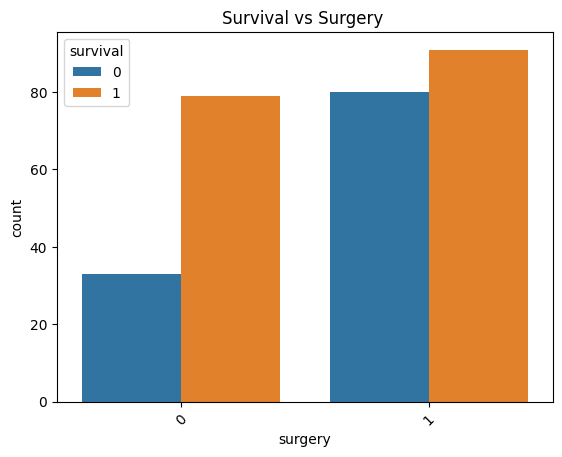

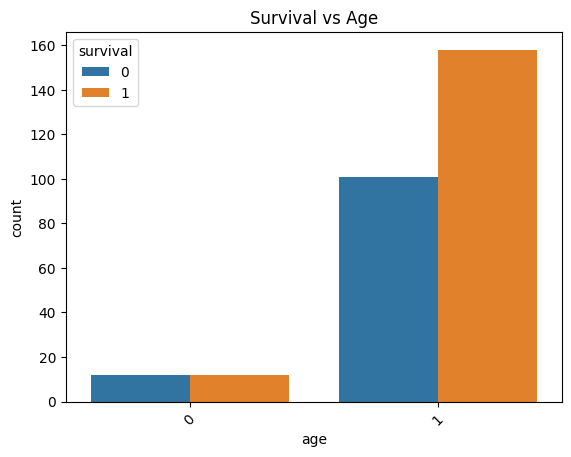

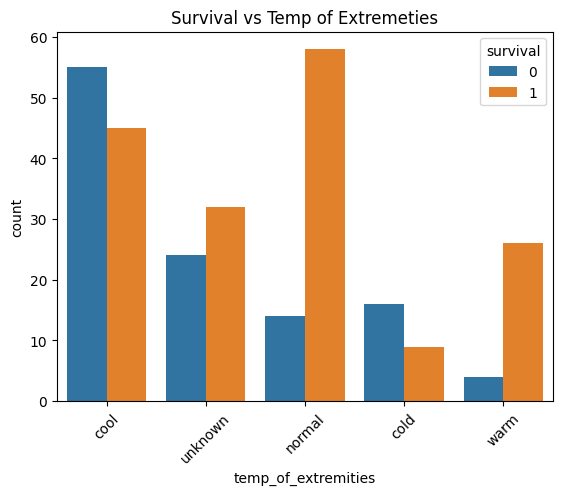

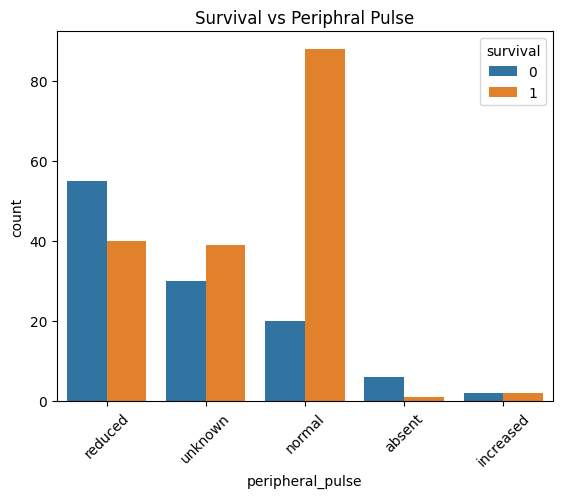

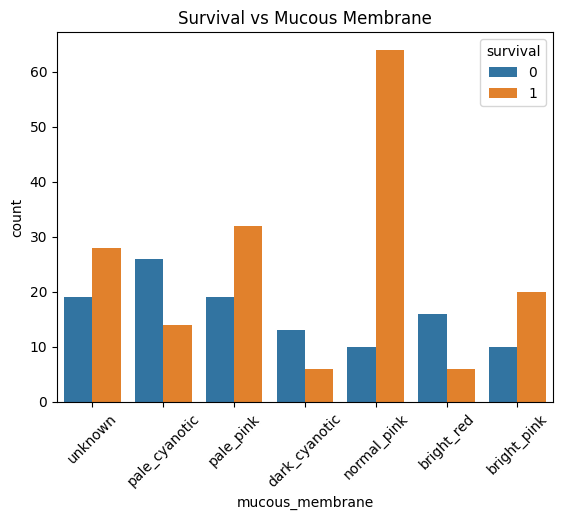

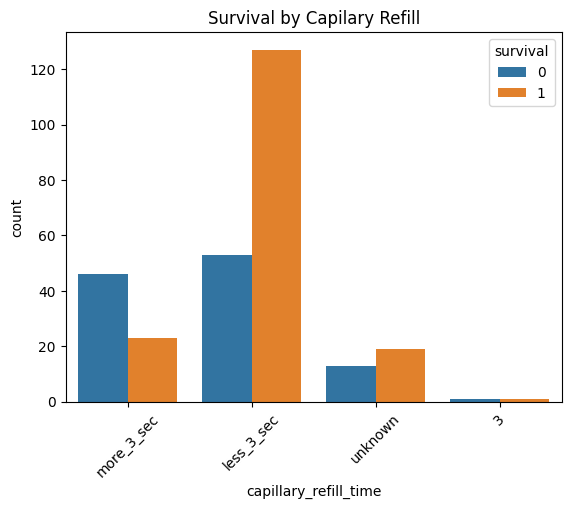

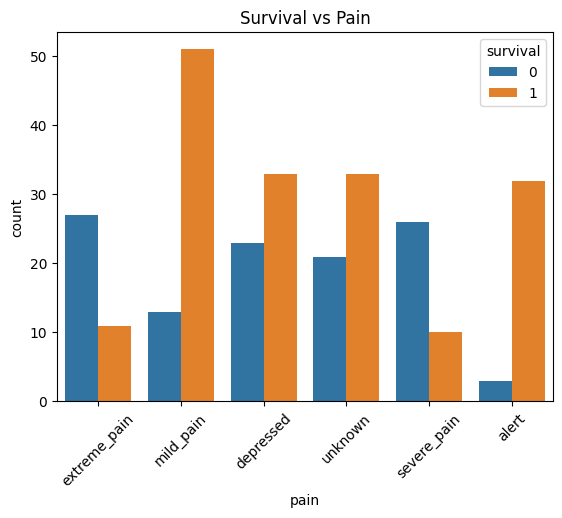

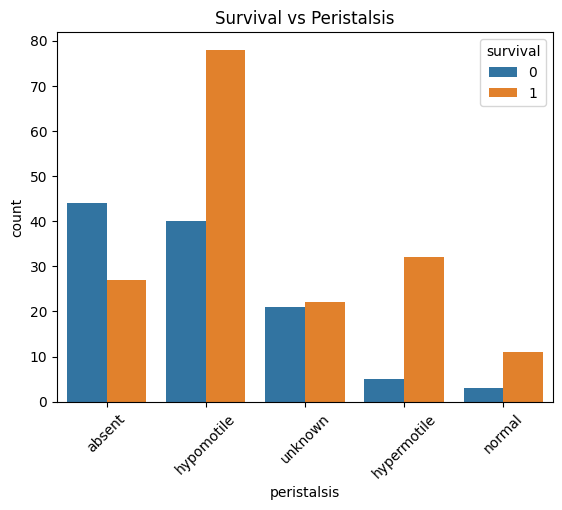

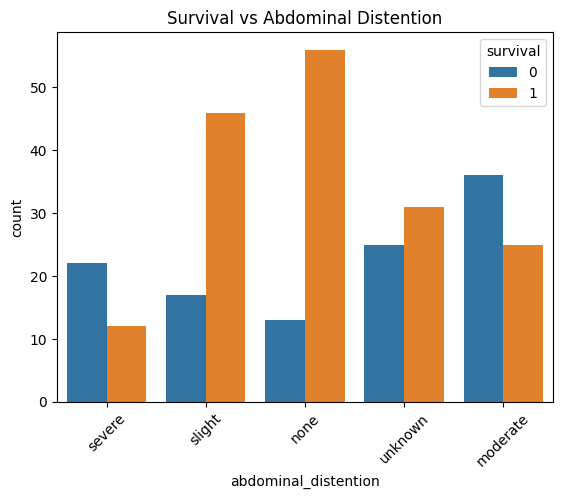

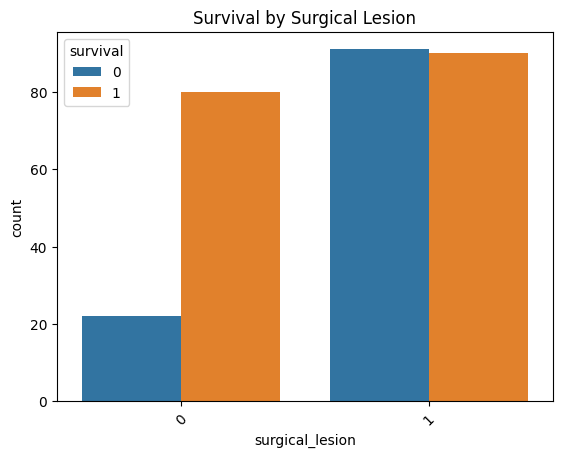

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='surgery', hue='survival')
plt.xticks(rotation=45)
plt.title('Survival vs Surgery ')
plt.show()

sns.countplot(data=df, x='age', hue='survival')
plt.xticks(rotation=45)
plt.title('Survival vs Age')
plt.show()

sns.countplot(data=df, x='temp_of_extremities', hue='survival')
plt.xticks(rotation=45)
plt.title('Survival vs Temp of Extremeties')
plt.show()

sns.countplot(data=df, x='peripheral_pulse', hue='survival')
plt.xticks(rotation=45)
plt.title('Survival vs Periphral Pulse')
plt.show()


sns.countplot(data=df, x='mucous_membrane', hue='survival')
plt.xticks(rotation=45)
plt.title('Survival vs Mucous Membrane')
plt.show()

sns.countplot(data=df, x='capillary_refill_time', hue='survival')
plt.xticks(rotation=45)
plt.title('Survival by Capilary Refill')
plt.show()

sns.countplot(data=df, x='pain', hue='survival')
plt.xticks(rotation=45)
plt.title('Survival vs Pain')
plt.show()

sns.countplot(data=df, x='peristalsis', hue='survival')
plt.xticks(rotation=45)
plt.title('Survival vs Peristalsis')
plt.show()

sns.countplot(data=df, x='abdominal_distention', hue='survival')
plt.xticks(rotation=45)
plt.title('Survival vs Abdominal Distention')
plt.show()

sns.countplot(data=df, x='surgical_lesion', hue='survival')
plt.xticks(rotation=45)
plt.title('Survival by Surgical Lesion')
plt.show()

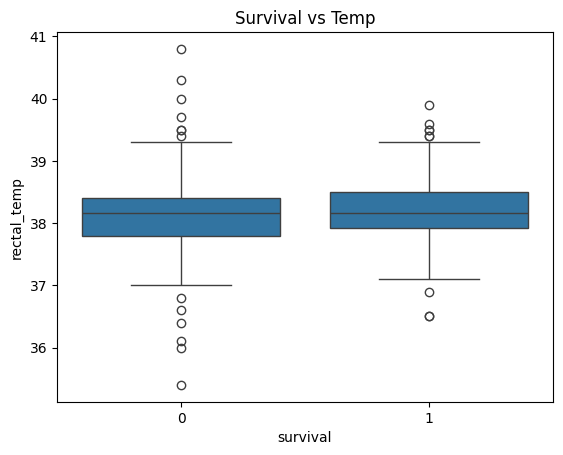

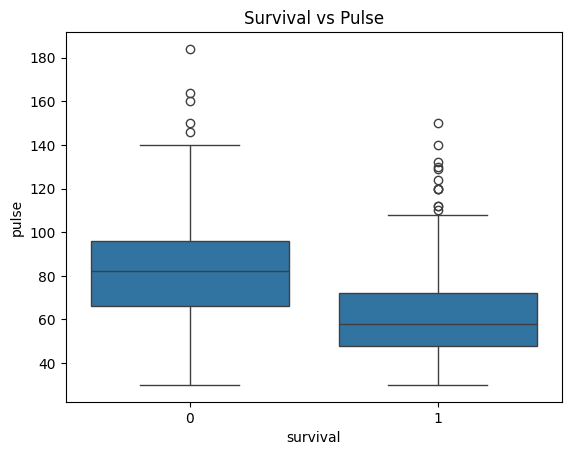

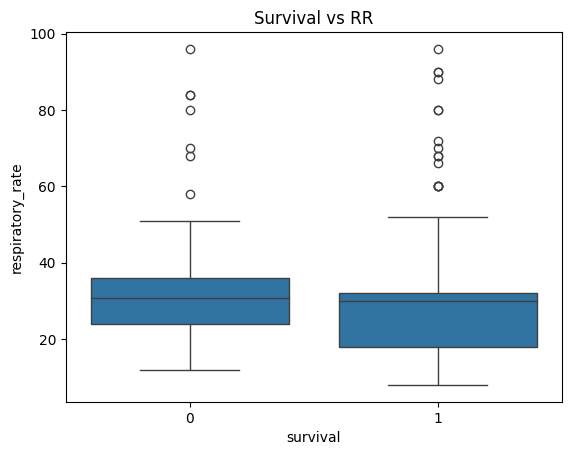

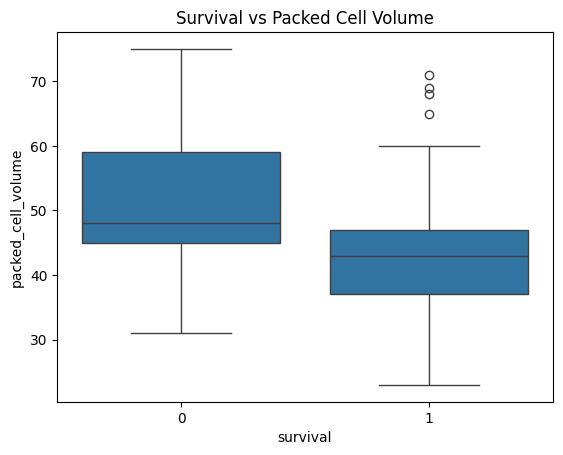

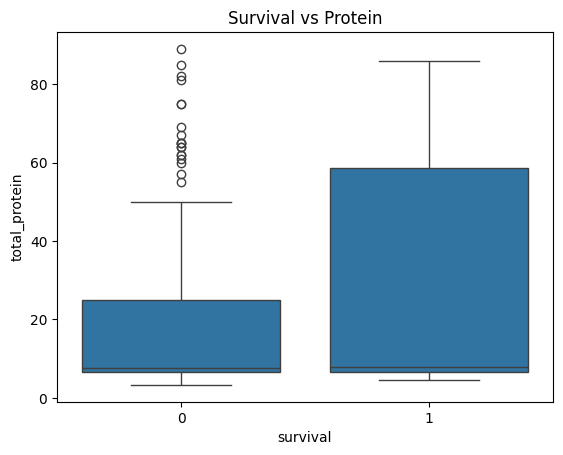

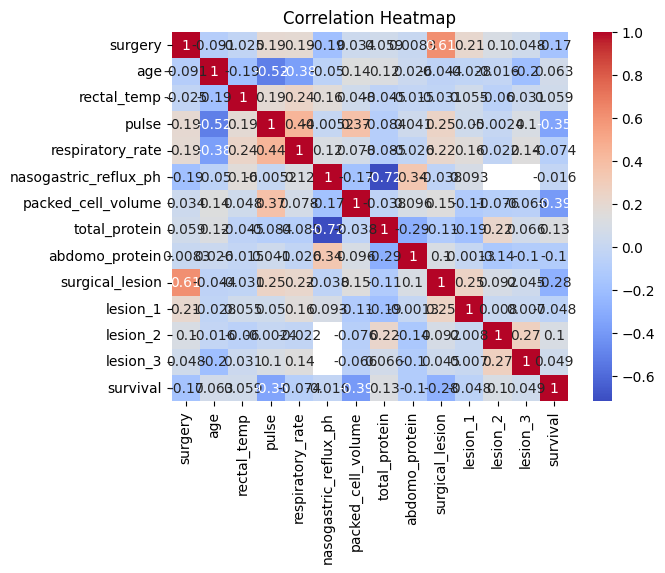

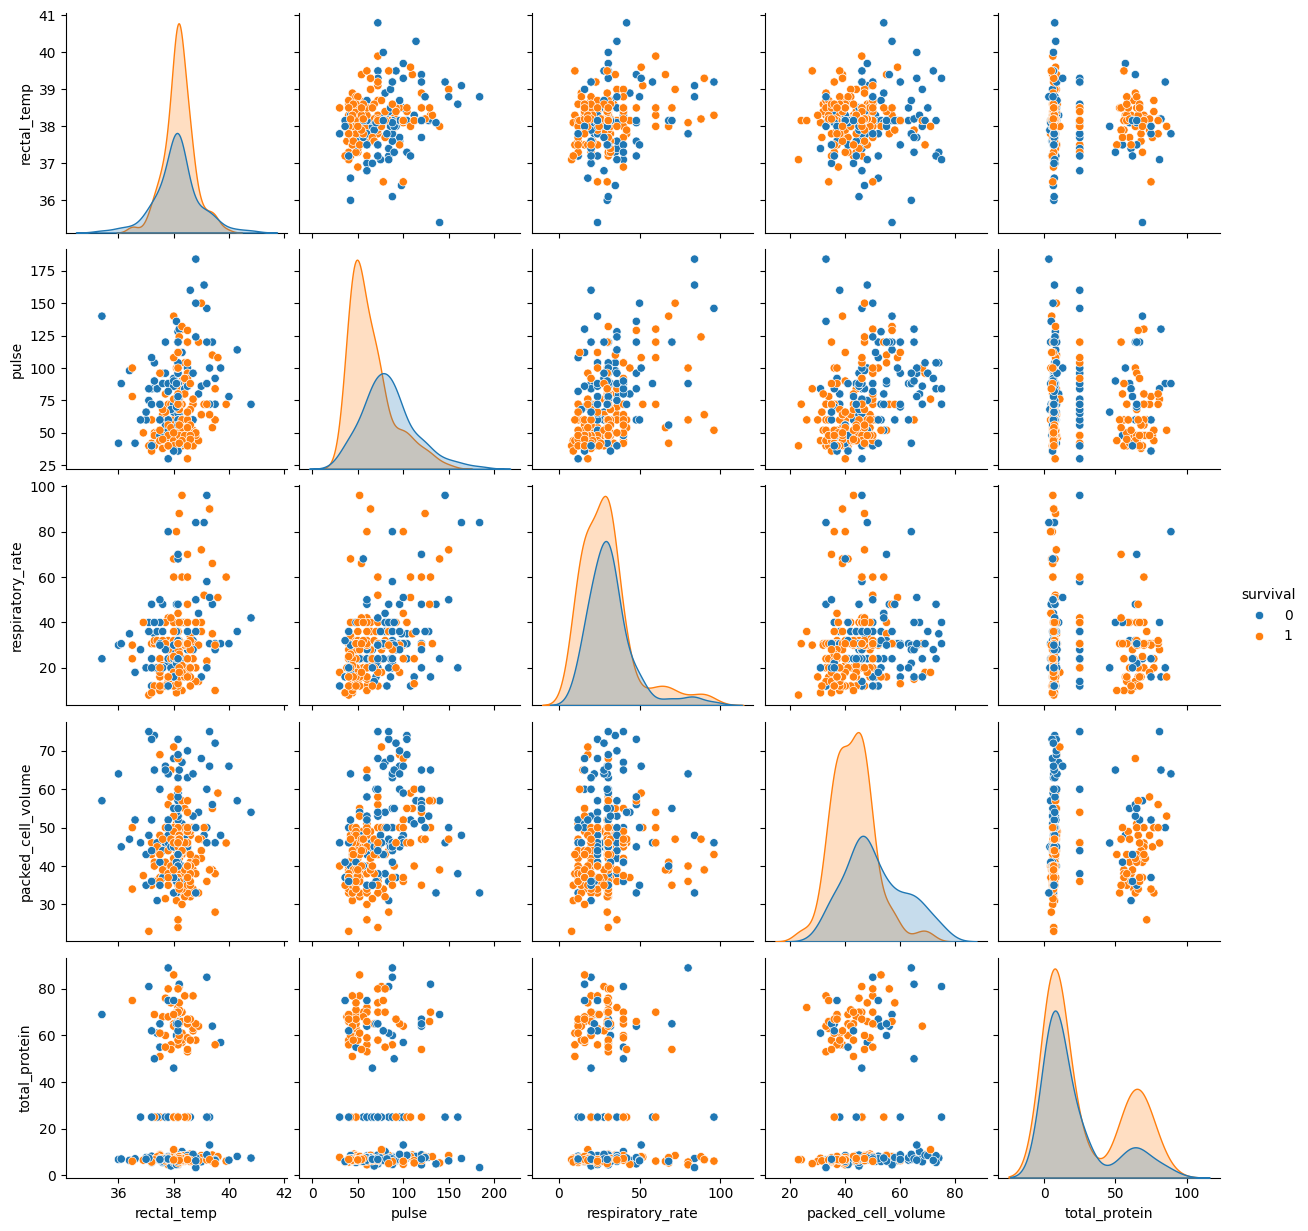


--- surgery ---
Mean:     0.60
Median:   1.00
Mode:     1.00
Min:      0.00
Max:      1.00
Range:    0.00 to 1.00
Outliers: No

--- age ---
Mean:     0.92
Median:   1.00
Mode:     1.00
Min:      0.00
Max:      1.00
Range:    0.00 to 1.00
Outliers: Yes
Outlier values in age:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

--- rectal_temp ---
Mean:     38.16
Median:   38.16
Mode:     38.16
Min:      35.40
Max:      40.80
Range:    35.40 to 40.80
Outliers: Yes
Outlier values in rectal_temp:
[39.9 35.4 40.3 39.7 36.4 39.6 36.8 39.5 36.5 36.  39.5 39.5 36.1 36.6
 40.8 40.  39.5 36.5]

--- pulse ---
Mean:     72.10
Median:   68.00
Mode:     48.00
Min:      30.00
Max:      184.00
Range:    30.00 to 184.00
Outliers: Yes
Outlier values in pulse:
[164. 150. 160. 184. 150.]

--- respiratory_rate ---
Mean:     30.64
Median:   30.00
Mode:     30.64
Min:      8.00
Max:      96.00
Range:    8.00 to 96.00
Outliers: Yes
Outlier values in respiratory_rate:
[84. 60. 60. 96. 72. 80. 80. 68. 96. 66. 68

In [11]:

# Compute correlation
sns.boxplot(data=df, x='survival', y='rectal_temp')
plt.title('Survival vs Temp')
plt.show()

sns.boxplot(data=df, x='survival', y='pulse')
plt.title('Survival vs Pulse')
plt.show()

sns.boxplot(data=df, x='survival', y='respiratory_rate')
plt.title('Survival vs RR')
plt.show()

sns.boxplot(data=df, x='survival', y='packed_cell_volume')
plt.title('Survival vs Packed Cell Volume')
plt.show()

sns.boxplot(data=df, x='survival', y='total_protein')
plt.title('Survival vs Protein')
plt.show()

corr = df.select_dtypes(include='number').corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

sns.pairplot(df, hue='survival', vars=['rectal_temp', 'pulse', 'respiratory_rate', 'packed_cell_volume', 'total_protein'])
plt.show()


#remove outliers from numeric data
numeric_df = df.select_dtypes(include='number')

# Store all outliers if needed later
all_outliers = {}

for col in numeric_df.columns:
    col_data = numeric_df[col].dropna() #just in case, since I didn't do it earlier for numeric cols!!
    q1 = col_data.quantile(0.25)
    q3 = col_data.quantile(0.75)
    iqr = q3 - q1 #iqr method to remove outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = col_data[(col_data < lower_bound) | (col_data > upper_bound)]
    has_outliers = not outliers.empty

    print(f"\n--- {col} ---")
    print(f"Mean:     {col_data.mean():.2f}")
    print(f"Median:   {col_data.median():.2f}")
    print(f"Mode:     {col_data.mode().iloc[0]:.2f}")
    print(f"Min:      {col_data.min():.2f}")
    print(f"Max:      {col_data.max():.2f}")
    print(f"Range:    {col_data.min():.2f} to {col_data.max():.2f}")
    print(f"Outliers: {'Yes' if has_outliers else 'No'}")

    if has_outliers:
        print(f"Outlier values in {col}:")
        print(outliers.values)
        all_outliers[col] = outliers.index.tolist()


outlier_indices = set(index for indices in all_outliers.values() for index in indices)


df = df.drop(index=outlier_indices)


print(df.head())
print(df.info())
print(df.describe())

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

X = df.drop(columns=['survival', 'outcome'])
y = df['survival']

cat_cols = X.select_dtypes(include='object').columns.tolist()
num_cols = X.select_dtypes(include='number').columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])


clf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [5, 10, None],
    'classifier__min_samples_split': [2, 5],
    'classifier__max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(clf_pipeline, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(X_train, y_train)

y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))
print("Best hyperparameters:", grid_search.best_params_)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
final_df = X_test.join(predictions_df)
print(final_df)

              precision    recall  f1-score   support

           0       0.75      0.38      0.50         8
           1       0.67      0.91      0.77        11

    accuracy                           0.68        19
   macro avg       0.71      0.64      0.63        19
weighted avg       0.70      0.68      0.66        19

Best hyperparameters: {'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Mean Squared Error: 0.3157894736842105
     surgery  age  rectal_temp       pulse  respiratory_rate  \
156        1    1    37.800000   60.000000         24.000000   
90         0    1    38.000000   52.000000         16.000000   
57         1    1    38.156828   64.000000         36.000000   
133        1    1    38.156828  100.000000         30.641921   
285        0    1    37.800000   82.000000         12.000000   
97         1    1    38.100000   88.000000         32.000000   
130        1    1    37.80000

                     Feature  Importance
3                      pulse    0.097980
7              total_protein    0.081130
10                  lesion_1    0.065327
2                rectal_temp    0.058081
6         packed_cell_volume    0.055712
4           respiratory_rate    0.049594
36         pain_extreme_pain    0.044896
21  peripheral_pulse_reduced    0.035388
14  temp_of_extremities_cool    0.033013
37            pain_mild_pain    0.032774


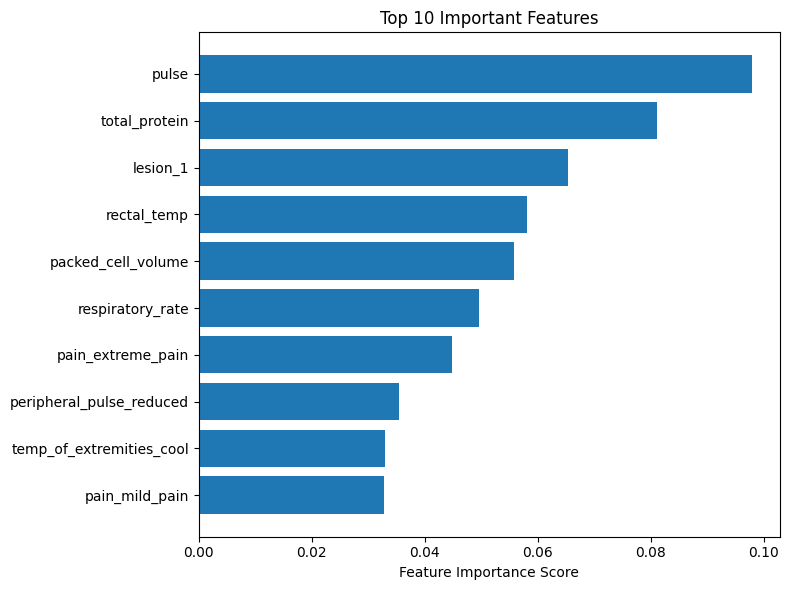

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

best_pipeline = grid_search.best_estimator_
preprocessor = best_pipeline.named_steps['preprocessor']
encoder = preprocessor.named_transformers_['cat']

encoded_cat_cols = encoder.get_feature_names_out(cat_cols)
feature_names = np.concatenate([num_cols, encoded_cat_cols])


importances = best_pipeline.named_steps['classifier'].feature_importances_


importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df.head(10))
######
plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'].head(10), importance_df['Importance'].head(10))
plt.xlabel('Feature Importance Score')
plt.title('Top 10 Important Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()